In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from random import random
import pandas as pd
import numpy as np
from scipy.stats import sem


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)
#print(mouse_drug.head())
#print(clinical_trial.head())

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial, mouse_drug,
                                 how='left', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
combined_data_group = combined_data.groupby(["Drug","Timepoint"])
tumor_volume_mean = combined_data_group["Tumor Volume (mm3)"].mean()
#tumor_volume_mean = combined_data.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]

tumor_volume_mean = tumor_volume_mean.reset_index()
tumor_volume_mean_df = pd.DataFrame(data = tumor_volume_mean)

tumor_volume_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_mean_df = pd.pivot_table(tumor_volume_mean, 
                                values = ['Tumor Volume (mm3)'], 
                                index=['Timepoint'],
                                columns =['Drug'],
                                aggfunc=np.sum, 
                                fill_value=0)
# Preview that Reformatting worked
tumor_volume_mean_df.head()


Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
standard_error_data = combined_data.groupby(['Drug','Timepoint'])["Tumor Volume (mm3)"].sem().reset_index()
standard_error_data_df = pd.DataFrame(data = standard_error_data)
standard_error_data_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
standard_error_data_df = pd.pivot_table(standard_error_data, 
                                values = ['Tumor Volume (mm3)'], 
                                index=['Timepoint'],
                                columns =['Drug'],
                                aggfunc=np.sum, 
                                fill_value=0)
# Preview that Reformatting worked
standard_error_data_df.head()

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182

In [6]:
#x-axis
time = standard_error_data_df.index.tolist()

#y-axis
capomulin = tumor_volume_mean_df.iloc[:,0].tolist()
infubinol = tumor_volume_mean_df.iloc[:,2].tolist()
ketapril = tumor_volume_mean_df.iloc[:,3].tolist()
placebo = tumor_volume_mean_df.iloc[:,5].tolist()

cap_error = standard_error_data_df.iloc[:,0].tolist()
inf_error = standard_error_data_df.iloc[:,2].tolist()
ket_error = standard_error_data_df.iloc[:,3].tolist()
pla_error = standard_error_data_df.iloc[:,5].tolist()

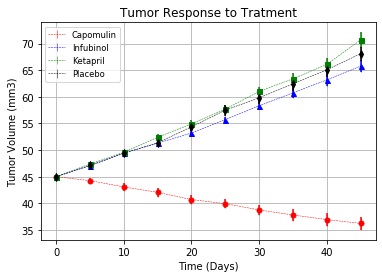

In [30]:
# Show the Figure
plt.errorbar(time,capomulin, yerr=cap_error, color='r', linestyle='dashed', linewidth=0.50, label='Capomulin')
plt.errorbar(time,capomulin, yerr=cap_error, color='r', fmt="o", markersize=5)

plt.errorbar(time, infubinol, yerr=inf_error, color='b', linestyle='dashed', linewidth=0.50, label='Infubinol')
plt.errorbar(time, infubinol, yerr=inf_error, color='b', fmt="^", markersize=5)

plt.errorbar(time, ketapril, yerr=ket_error, color='g', linestyle='dashed', linewidth=0.50, label='Ketapril')
plt.errorbar(time, ketapril, yerr=ket_error, color='g',fmt="s", markersize=5)

plt.errorbar(time, placebo, yerr=pla_error, color='k', linestyle='dashed', linewidth=0.50, label='Placebo')
plt.errorbar(time, placebo, yerr=pla_error, color='k', fmt='d', markersize=5)

plt.title("Tumor Response to Tratment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.show()


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
#plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()

![Metastatic Spread During Treatment](../Images/change.png)